<a href="https://colab.research.google.com/github/matildecanete/proyecto2/blob/main/Proyecto2_parte2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [174]:
from google.colab import drive
drive.mount ('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [176]:
df = pd.read_csv('/content/customer_data.csv')
df.head()

,id,age,gender,income,education,region,loyalty_status,purchase_frequency,purchase_amount,product_category,promotion_usage,satisfaction_score
0,1,27,Male,40682,Bachelor,East,Gold,frequent,18249,Books,0,6
1,2,29,Male,15317,Masters,West,Regular,rare,4557,Clothing,1,6
2,3,37,Male,38849,Bachelor,West,Silver,rare,11822,Clothing,0,6
3,4,30,Male,11568,HighSchool,South,Regular,frequent,4098,Food,0,7
4,5,31,Female,46952,College,North,Regular,occasional,19685,Clothing,1,5


In [177]:
df.drop(columns= "id", inplace=True) #Se elimina columna "id" ya que no aporta información útil para el análisis o modelado de datos.

In [178]:
df.shape

(100000, 11)

In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   age                 100000 non-null  int64 
 1   gender              100000 non-null  object
 2   income              100000 non-null  int64 
 3   education           100000 non-null  object
 4   region              100000 non-null  object
 5   loyalty_status      100000 non-null  object
 6   purchase_frequency  100000 non-null  object
 7   purchase_amount     100000 non-null  int64 
 8   product_category    100000 non-null  object
 9   promotion_usage     100000 non-null  int64 
 10  satisfaction_score  100000 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 8.4+ MB


Tipo de columna:

- age : Numérica
- gender : Nominal
- income : Numérica
- education : Nominal
- region : Nominal
- loyalty_status : Ordinal
- purchase_frequency : Ordinal
- purchase_amount : Numérica
- product_category : Nominal
- promotion_usage : Numérica
- satisfaction_score : Numérica

In [180]:
df.isna().sum()

age                   0
gender                0
income                0
education             0
region                0
loyalty_status        0
purchase_frequency    0
purchase_amount       0
product_category      0
promotion_usage       0
satisfaction_score    0
dtype: int64

>No hay valores faltantes.

In [181]:
df.duplicated().sum()

0

>No hay valores duplicados.

In [182]:
df.describe()

,age,income,purchase_amount,promotion_usage,satisfaction_score
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,30.003260,27516.269880,9634.790840,0.300800,5.009650
std,4.480535,12996.782587,4799.339449,0.458608,1.038714
min,12.000000,5000.000000,1118.000000,0.000000,0.000000
25%,27.000000,16271.750000,5583.000000,0.000000,4.000000
50%,30.000000,27584.500000,9452.000000,0.000000,5.000000
75%,33.000000,38747.250000,13350.000000,1.000000,6.000000
max,49.000000,50000.000000,26204.000000,1.000000,10.000000


>No hay valores inconsistentes en las columnas numéricas.

Identificar inconsistencias en los datos para los valores categóricos.

In [183]:
print(df['gender'].value_counts(), end = "\n\n")
print(df['education'].value_counts(), end = "\n\n")
print(df['region'].value_counts(), end = "\n\n")
print(df['loyalty_status'].value_counts(), end = "\n\n")
print(df['purchase_frequency'].value_counts(), end = "\n\n")
print(df['product_category'].value_counts(), end = "\n\n")

gender
Female    50074
Male      49926
Name: count, dtype: int64

education
College       39874
Bachelor      30279
HighSchool    20031
Masters        9816
Name: count, dtype: int64

region
East     30074
West     29935
South    20073
North    19918
Name: count, dtype: int64

loyalty_status
Regular    60138
Silver     29964
Gold        9898
Name: count, dtype: int64

purchase_frequency
rare          50019
occasional    29886
frequent      20095
Name: count, dtype: int64

product_category
Electronics    30027
Clothing       19989
Books          14925
Food           14822
Health         10123
Home            5079
Beauty          5035
Name: count, dtype: int64



>No hay valores inconsistentes en las columnas categóricas.

Columna "satisfaction_score".

In [184]:
df["satisfaction_score"].value_counts()

satisfaction_score
5     38490
6     24315
4     23854
7      6123
3      6018
8       616
2       534
9        30
1        18
10        1
0         1
Name: count, dtype: int64

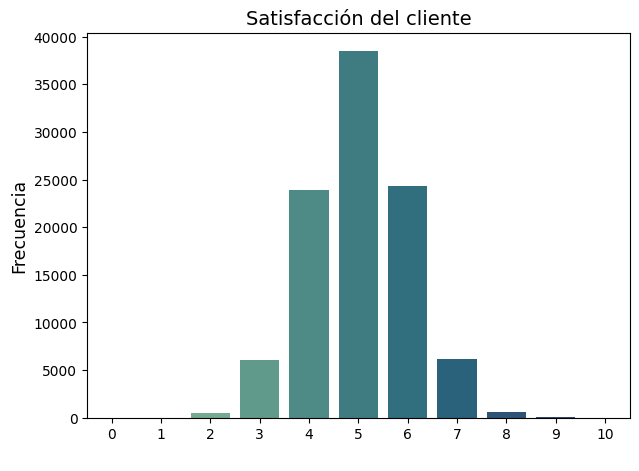

In [185]:
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x="satisfaction_score", hue="satisfaction_score", palette='crest', legend=False)
plt.title("Satisfacción del cliente", size=14)
plt.xlabel(" ")
plt.ylabel("Frecuencia", size=12.5)
plt.show()

Nueva columna como objetivo.

La columna "satisfaction_score" presenta valores del 1 al 10.

Se procederá a crear una nueva columna como objetivo en base a los valores de "satisfaction_score", esto con el fin de que la nueva columna sea de clase binaria.

Se va a considerar del 0 al 4 como "Insatisfecho" (0) y del 5 al 10 como "Satisfecho" (1).


In [186]:
df = df.assign(total_score=lambda x: x['satisfaction_score'].apply(lambda y: 0 if y <= 4 else 1))
df.head()

,age,gender,income,education,region,loyalty_status,purchase_frequency,purchase_amount,product_category,promotion_usage,satisfaction_score,total_score
0,27,Male,40682,Bachelor,East,Gold,frequent,18249,Books,0,6,1
1,29,Male,15317,Masters,West,Regular,rare,4557,Clothing,1,6,1
2,37,Male,38849,Bachelor,West,Silver,rare,11822,Clothing,0,6,1
3,30,Male,11568,HighSchool,South,Regular,frequent,4098,Food,0,7,1
4,31,Female,46952,College,North,Regular,occasional,19685,Clothing,1,5,1


In [187]:
df.shape

(100000, 12)

Visuales univariantes para el objetivo y todas las características.

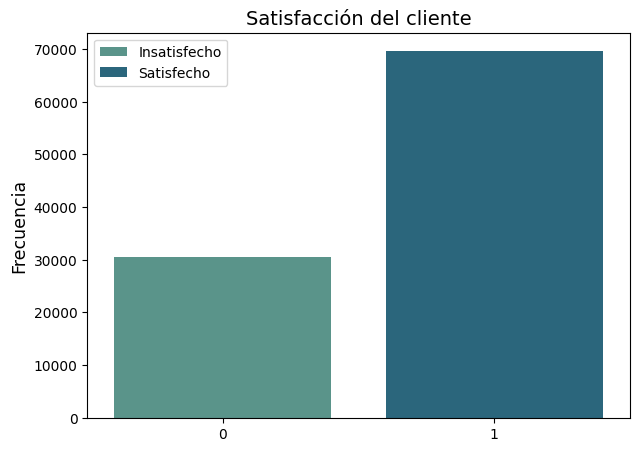

In [188]:
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x="total_score", hue="total_score", palette='crest', legend=False)
plt.title("Satisfacción del cliente", size=14)
plt.xlabel(" ")
plt.ylabel("Frecuencia", size=12.5)
labels = ["Insatisfecho", "Satisfecho"]
plt.legend(labels)
plt.show()

In [189]:
promotion_by_score = df.groupby("promotion_usage")["total_score"].value_counts()
promotion_by_score

promotion_usage  total_score
0                1              48611
                 0              21309
1                1              20964
                 0               9116
Name: count, dtype: int64

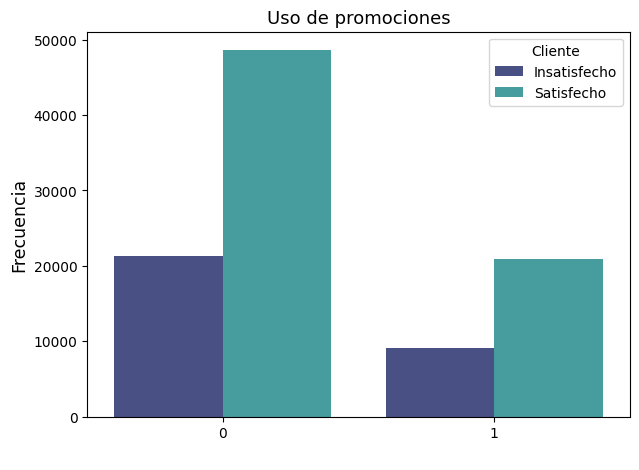

In [190]:
plt.figure(figsize=(7 , 5))
sns.countplot(data=df, x="promotion_usage", hue="total_score", palette='mako')
plt.title("Uso de promociones", size=13)
plt.xlabel(" ")
plt.ylabel("Frecuencia" , size=12.5)
labels = ["Insatisfecho", "Satisfecho"]
plt.legend(labels, title="Cliente")
plt.show()

>El uso de promociones es bajo en general. Los clientes de la clase "Satisfecho" son los que menos las utilizan.

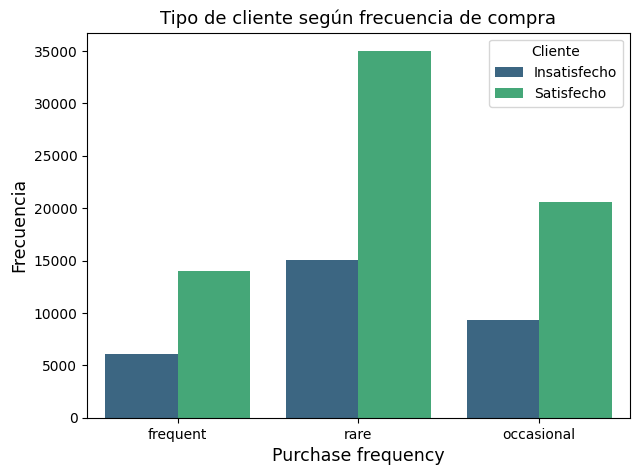

In [191]:
plt.figure(figsize=(7 , 5))
sns.countplot(data=df, x="purchase_frequency", hue="total_score", palette='viridis')
plt.title("Tipo de cliente según frecuencia de compra", size=13)
plt.xlabel("Purchase frequency", size=12.5)
plt.ylabel("Frecuencia", size=12.5)
labels = ["Insatisfecho", "Satisfecho"]
plt.legend(labels, title= "Cliente")
plt.show()

>En las tres categorías de frecuencia de compra, los clientes de la clase "Satisfecho" predominan.

In [192]:
purchase_by_loyalty = df.groupby("loyalty_status")["purchase_frequency"].value_counts()
purchase_by_loyalty

loyalty_status  purchase_frequency
Gold            rare                   4974
                occasional             2932
                frequent               1992
Regular         rare                  30112
                occasional            18037
                frequent              11989
Silver          rare                  14933
                occasional             8917
                frequent               6114
Name: count, dtype: int64

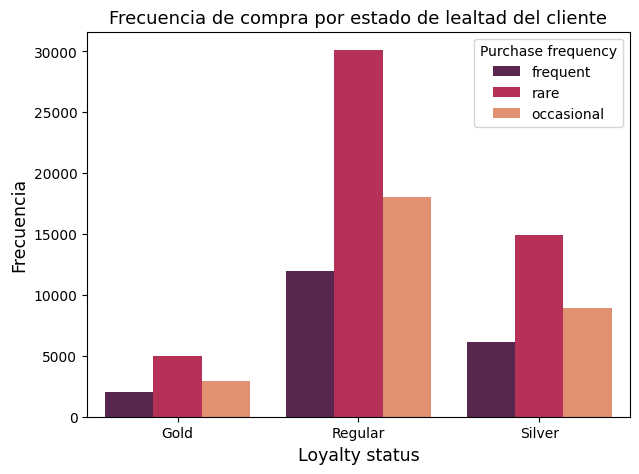

In [193]:
plt.figure(figsize=(7 , 5))
sns.countplot(data=df, x="loyalty_status", hue="purchase_frequency", palette='rocket')
plt.title("Frecuencia de compra por estado de lealtad del cliente", size=13)
plt.xlabel("Loyalty status", size=12.5)
plt.ylabel("Frecuencia", size=12.5)
labels = ["frequent", "rare", "occasional"]
plt.legend(labels, title= "Purchase frequency")
plt.show()

>Los clientes regulares destacan por encima de los demás en las tres categorías de frecuencia de compra.

In [194]:
df["gender"].value_counts()

gender
Female    50074
Male      49926
Name: count, dtype: int64

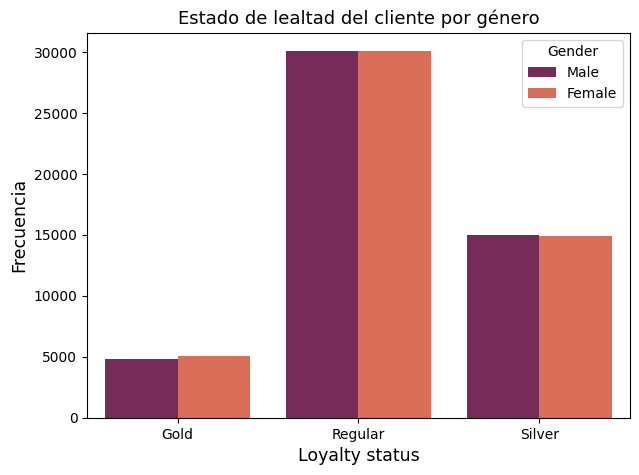

In [195]:
plt.figure(figsize=(7 , 5))
sns.countplot(data=df, x="loyalty_status", hue="gender", palette='rocket')
plt.title("Estado de lealtad del cliente por género", size=13)
plt.xlabel("Loyalty status", size=12.5)
plt.ylabel("Frecuencia", size=12.5)
plt.legend(title= "Gender")
plt.show()

>El estado de lealtad entre clientes de género masculino y femenino es equitativo en las tres categorías.

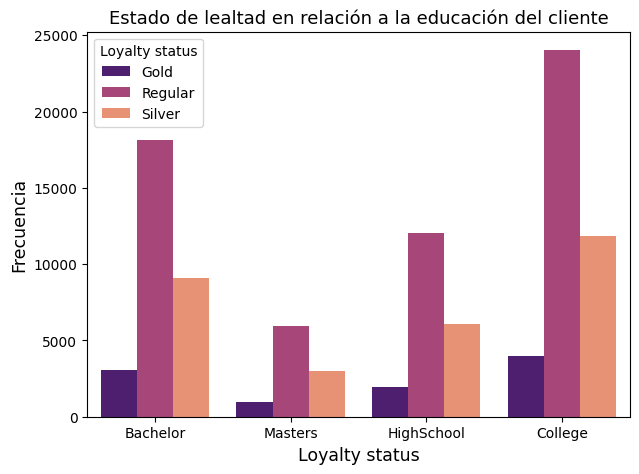

In [196]:
plt.figure(figsize=(7 , 5))
sns.countplot(data=df, x="education", hue="loyalty_status", palette='magma')
plt.title("Estado de lealtad en relación a la educación del cliente", size=13)
plt.xlabel("Loyalty status", size=12.5)
plt.ylabel("Frecuencia", size=12.5)
plt.legend(title= "Loyalty status")
plt.show()

>El estado de lealtad "Regular" destaca en los cuatro niveles de educación. Los clientes con educación "College" sobresalen en las tres categorías de lealtad.

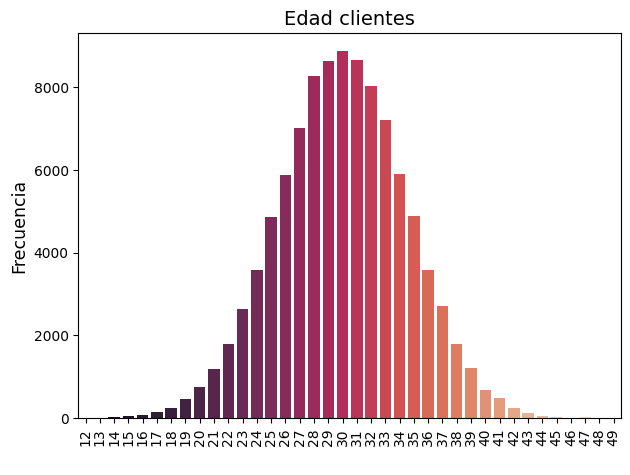

In [197]:
plt.figure(figsize=(7 , 5))
sns.countplot(data=df, x="age", hue="age", palette='rocket', legend=False)
plt.title("Edad clientes", size=14)
plt.xlabel(" ")
plt.ylabel("Frecuencia", size=12.5)
plt.xticks(rotation=90)
plt.show()

>La mayor concentración de clientes se encuentra entre los 28 y 32 años.

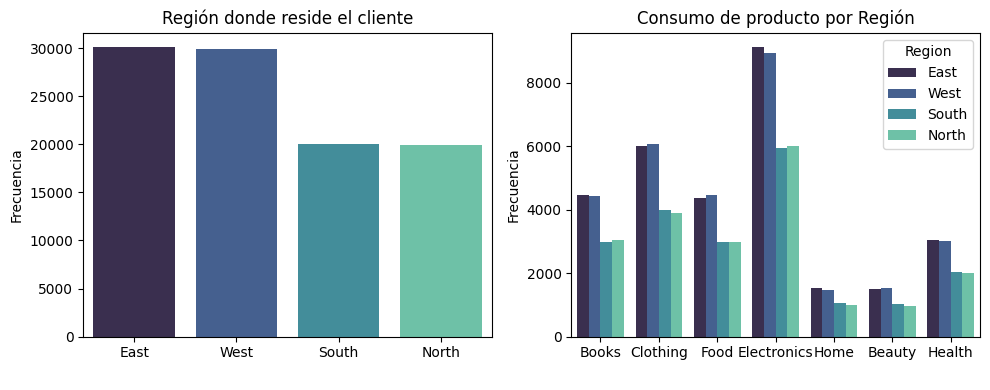

In [200]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
sns.countplot(ax=axes[0], data=df, x='region', hue="region", palette='mako', legend=False)
axes[0].set_title("Región donde reside el cliente")
axes[0].set_xlabel(" ")
axes[0].set_ylabel("Frecuencia")
sns.countplot(ax=axes[1], data=df, x="product_category", hue="region", palette='mako')
axes[1].set_title("Consumo de producto por Región")
axes[1].set_xlabel(" ")
axes[1].set_ylabel("Frecuencia")
axes[1].legend(title="Region", loc="upper right")
plt.tight_layout()
plt.show()

>La mayoría de los clientes residen en las regiones "East" y "West". La frecuencia de compra para cada categoría de producto es similar entre estas regiones.



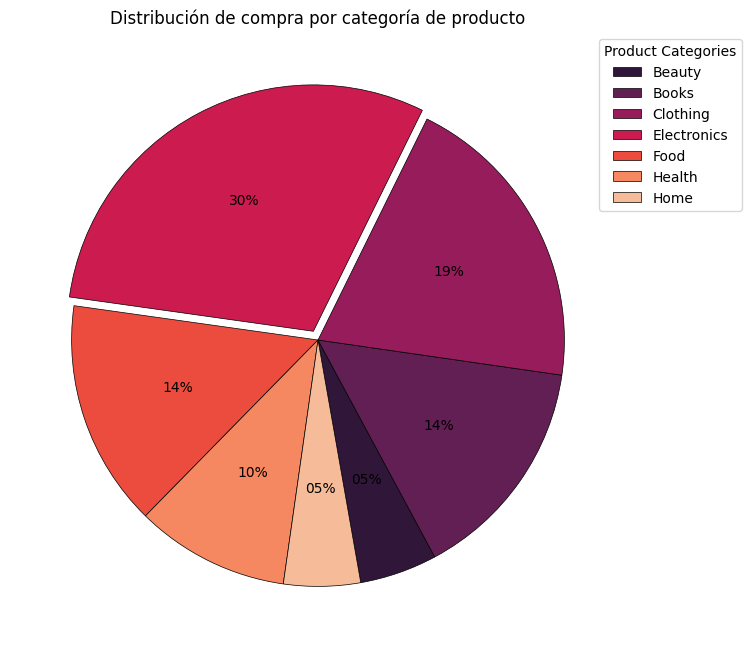

In [201]:
product_purchase = df.groupby('product_category')['purchase_amount'].sum()
plt.figure(figsize=(8, 8))
explotar = [0, 0, 0, 0.04, 0, 0, 0]
colors = sns.color_palette("rocket" , 7)
plt.pie(product_purchase, explode=explotar, autopct='%.2d%%', colors=colors, startangle=-80, wedgeprops={'edgecolor':'k' , 'lw':0.5})
plt.legend(product_purchase.index, title="Product Categories", loc="upper right", bbox_to_anchor=(1.2, 1))
plt.title("Distribución de compra por categoría de producto")
plt.show()

>La categoría de productos más consumida es "Electronics" (30%), seguida por "Clothing" (19%). Los productos de las categorías "Foods" y "Books" tienen un nivel de consumo del 14%, mientras que "Health" representa un 10%. Las categorías "Home" y "Beauty" tienen el mismo nivel de consumo, con un 5% cada una.

Boxplot

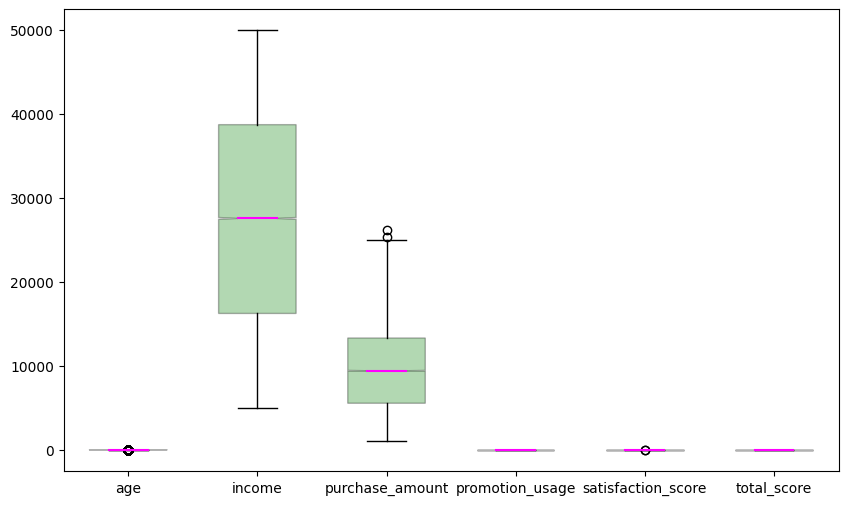

In [202]:
box_plot = df.select_dtypes(include="number")
fig, axes = plt.subplots(figsize = (10, 6))
plt.boxplot(box_plot, labels=box_plot.columns, widths = 0.6, notch = True, patch_artist=True ,
            medianprops = dict(linestyle='-', linewidth=1.5, color="magenta"),
                               boxprops = dict(linestyle='-', linewidth=1, facecolor ="green" , alpha = 0.3));
plt.show()

>Hay dos outliers en la columna "purchase_amount".

In [203]:
Q1 = df["purchase_amount"].quantile(0.25)
Q3 = df["purchase_amount"].quantile(0.75)
IQR = Q3 - Q1

In [204]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [205]:
outliers = df[(df["purchase_amount"] < lower_bound) | (df["purchase_amount"] > upper_bound)]
outliers

,age,gender,income,education,region,loyalty_status,purchase_frequency,purchase_amount,product_category,promotion_usage,satisfaction_score,total_score
72791,32,Female,48213,College,North,Regular,rare,25406,Electronics,0,6,1
91489,34,Male,49710,Bachelor,North,Silver,frequent,26204,Clothing,0,6,1


Mapa de correlación

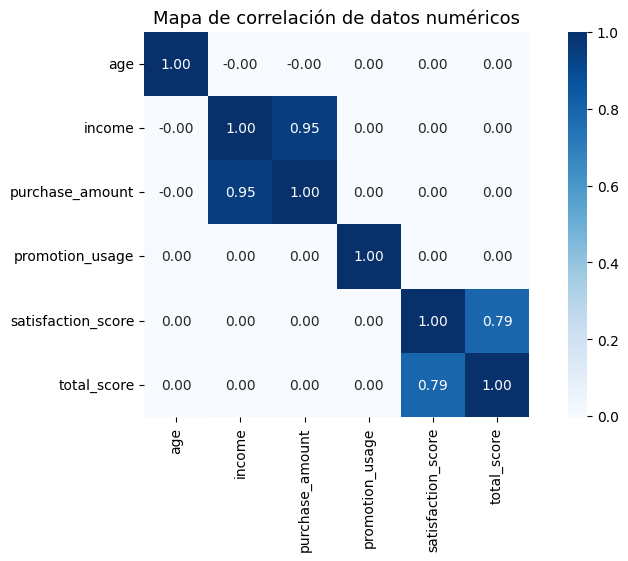

In [206]:
numeros_df = df.select_dtypes(include="number")
mapa_correlacion = numeros_df.corr()

plt.figure(figsize=(10 , 5))
sns.heatmap(mapa_correlacion, annot=True , square=True , cmap="Blues", fmt="0.2f")
plt.title("Mapa de correlación de datos numéricos" , fontsize = 13)
plt.show()

>La presencia de correlación entre la mayoría de las características es casi nula.

>La columna objetivo "total_score" presenta una alta correlación con la columna "satisfaction_score", ya que sus datos se derivan de "satisfaction_score".

>Las características "income" y "purchase_amount" muestran una correlación muy alta. Esto se debe a que reflejan la relación entre los ingresos anuales del cliente y el importe gastado por el cliente en cada compra. Es decir, a medida que los ingresos del cliente aumentan, su capacidad de consumo también tiende a aumentar.

